<a href="https://colab.research.google.com/github/udit51/ML/blob/main/BasicProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df= pd.read_csv('/content/placement(Project-1)File.csv')

In [ ]:
df.head()  # gives the overview of the function

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split  -> cross validation
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df =df.iloc[:,1:]  # mujhse ssaare rows chahiye and column 1 onwards chahiye

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA


In [ ]:
  import matplotlib.pyplot as plt
  import seaborn as sns

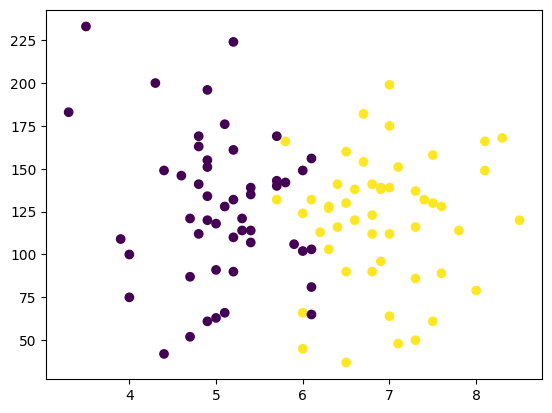

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])
#plot karne ke baad color code kiya hai jinka placement ho gya hai


**LOGISTIC REGRESSION ML MODEL**  -> data ko divide kr dega if it has linear behaviour which it dones internally
EDA gives idea of the data what operations to use

> Add blockquote



In [ ]:
X = df.iloc[:,0:2]
Y= df.iloc[:,-1]

In [ ]:
X  #2-D tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y #1-D Tensor

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split  #this train test split is function which takes independent and depemdent variable as parameters

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)  # test size means 10 percent data goes to test size and 90 percent goes to training set which is very random


In [ ]:
X_test

,cgpa,iq
80,4.9,196.0
1,5.9,106.0
44,7.5,61.0
57,6.5,130.0
50,3.5,233.0
68,4.0,75.0
55,7.8,114.0
30,7.6,128.0
67,5.0,118.0
61,7.3,137.0


In [ ]:
Y_train

,placement
20,1
72,1
6,0
69,1
11,1
...,...
45,1
71,1
25,0
70,1


In [ ]:
#scaling  -> this transforms the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-0.99957009,  1.89652926],
       [-0.08253331, -0.43810402],
       [ 1.38472553, -1.60542067],
       [ 0.46768876,  0.18446485],
       [-2.28342157,  2.85632294],
       [-1.82490318, -1.24225549],
       [ 1.65983656, -0.23058107],
       [ 1.47642921,  0.13258411],
       [-0.90786641, -0.12681959],
       [ 1.20131818,  0.36604744]])

**Now we will train the model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf= LogisticRegression()  #object
clf.fit(X_train,Y_train)  # fit is used to train the model and this is model training it needs train data only



LogisticRegression()

**MODEL EVALUATION**

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
Y_test

,placement
80,0
1,0
44,1
57,1
50,0
68,0
55,1
30,1
67,0
61,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)  # sahi data batao aur predction batana hota hai

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

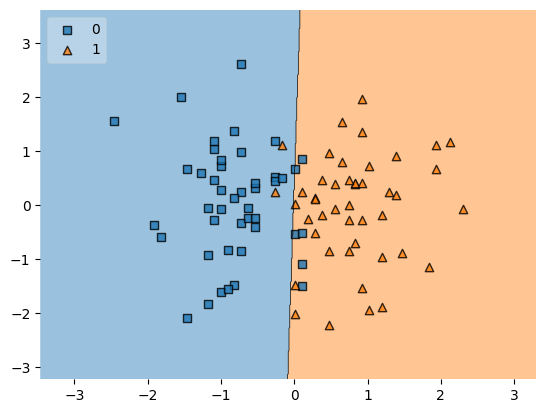

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
#the above step is last and take the model by calling pickle which covert object in file

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
#after doing this just deploy it  into the website
#we can deploy on heruku or AWS or google cloud..........................